In [2]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt

In [7]:
x = np.linspace(-100,100,200)

In [8]:
yd = 1/(1 + np.exp(-1*x))

In [9]:
y = np.random.randint(-0,2,200)

In [15]:
loss = (yd - y)**2

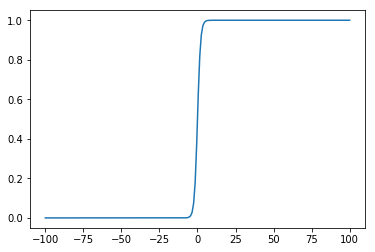

In [16]:
plt.plot(x,yd)

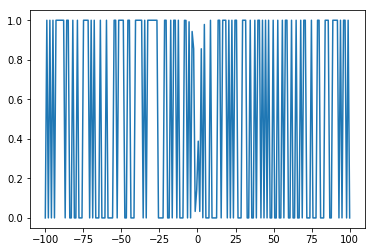

In [17]:
plt.plot(x,loss)
# this is why mse not good for neural networks or logistic regression 

In [19]:
uni = np.unique(y,return_counts=True)
#loss_true = -1 * np.log()

In [103]:
mean_01 = np.array([0.0, 0.0])
mean_02 = np.array([10., 10.])

cov_01 = np.array([[2.0, 1.0],
                   [1.0, 3.0]])
cov_02 = np.array([[4.0, 0.0],
                   [0.0, 2.0]])

In [204]:
blob1 = np.random.multivariate_normal(mean_01 , cov_01,250)
blob2 = np.random.multivariate_normal(mean_02 , cov_02,250)


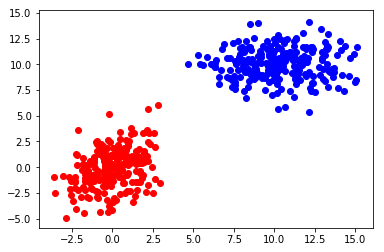

In [205]:
plt.scatter(blob1[:,0], blob1[:,1], color ="red")
plt.scatter(blob2[:,0], blob2[:,1], color = "blue")

In [206]:
X = np.concatenate((blob1,blob2))
res = np.concatenate((np.ones(250),np.zeros(250)))  
res = res.reshape((-1,1))
X = np.concatenate((X,res),axis = 1)

In [207]:
np.random.shuffle(X)
#print X[:10,:]
partition = 0.75*X.shape[0]
X_train = X[:int(partition),:]
X_test = X[int(partition + 1) : , :]

In [208]:
class FeedForwardNet(torch.nn.Module):
    def __init__(self,features,hidden_1,hidden_2,out):
        super(FeedForwardNet , self).__init__()
        self.weights1 = torch.nn.Linear(features, hidden_1)
        self.weights2 = torch.nn.Linear(hidden_1, hidden_2)
        self.weights3 = torch.nn.Linear(hidden_2,out)
        
    def forward(self,x):     # x are the features
        x = torch.nn.functional.relu(self.weights1(x))
        x = torch.nn.functional.relu(self.weights2(x))
        output = torch.nn.functional.softmax(self.weights3(x))
        return output
        

In [209]:
# def fun(x):
#     x = x**2
#     x = x.sum()
#     x.backward()
#     print x.grad_fn
#     print id(x)
#     x = x**3
#     print x.grad_fn
#     print id(x)
    
    
# x = torch.tensor([1,2,3], requires_grad=True)
# fun(x)
# print x.grad_fn
# print id(x)
# x = x**2
# x = x.sum()
# print id(x)
# print x.grad_fn
# x.backward()

In [210]:
Y_train = torch.tensor(X_train[:,2],requires_grad = False).long()
X_train = torch.tensor(X_train[:,:2],requires_grad=True).float()

print X_train.shape

torch.Size([375, 2])


In [211]:
np.unique(Y_train,return_counts=True)[1]

array([185, 190])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


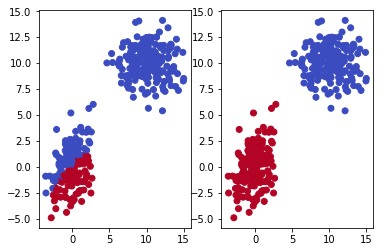

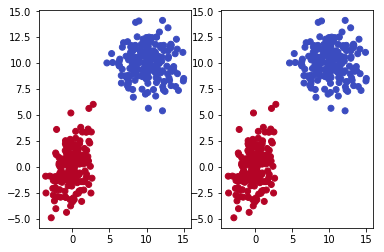

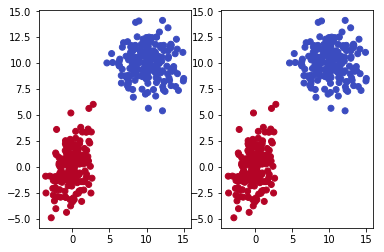

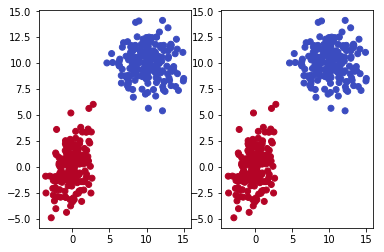

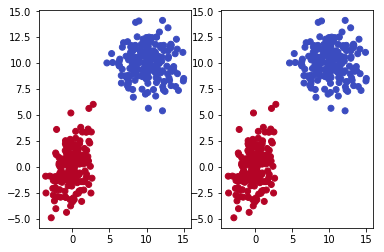

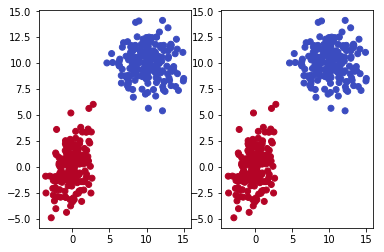

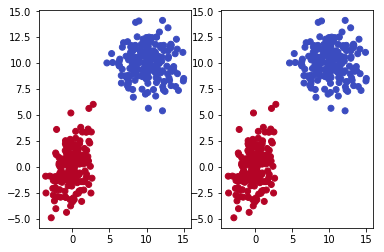

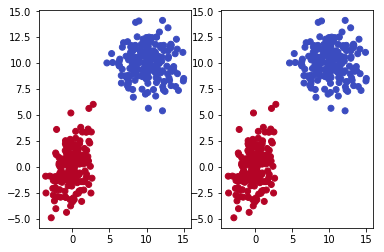

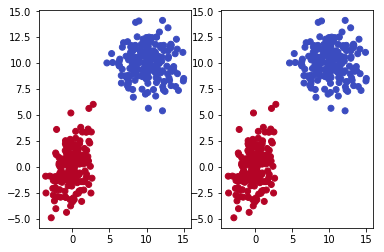

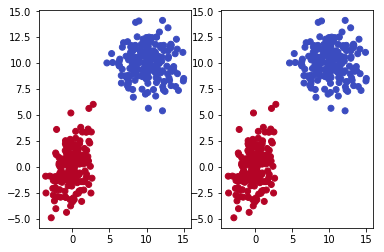

In [213]:
net = FeedForwardNet(2,4,4,2)
optimiser = torch.optim.Adam(net.parameters(), lr = 0.05)
loss_func = torch.nn.CrossEntropyLoss()
for epoch in range(100):
    output = net(X_train)
    loss = loss_func(output,Y_train)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
    if epoch%10 == 0:
        pred_y = torch.max(output,1)[1]
        x_train = X_train.detach().numpy()
        plt.figure(0)
        
        plt.subplot(1,2,1)
        plt.scatter(x_train[:,0],x_train[:,1],c = pred_y, cmap= "coolwarm")
        
        plt.subplot(1,2,2)
        plt.scatter(x_train[:,0],x_train[:,1],c = Y_train, cmap= "coolwarm")
                
        plt.pause(0.05)

In [166]:
x = np.array(([1,2],[2,3],[3,4]))

In [130]:
y = np.array([0,1,0])
y = y.reshape(3,1)
x = np.concatenate((x,y),axis = 1)

In [131]:
t= np.array([0,0,1])
t=t.reshape((3,1))

In [132]:
print x

[[1 2 0]
 [2 3 1]
 [3 4 0]]


In [85]:
# plt.figure(0)

# x_01 = x[x[:,2] == 0]
# x_02 = x[x[:,2] == 1]

# print x_01[:,1:2]
#     plt.scatter(x[:,0],x[:,1],color = "red")

[[2]
 [4]]


In [134]:
x

array([[1, 2, 0],
       [2, 3, 1],
       [3, 4, 0]])

In [86]:
plt.pause?

In [128]:
torch.max?

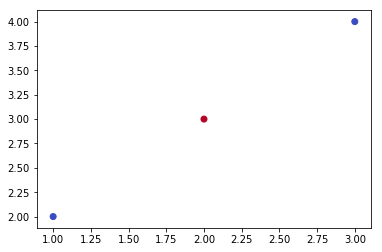

In [142]:
plt.scatter( x[:,0],x[:,1], c = x[:,2], cmap='coolwarm' )

In [137]:
plt.scatter?